In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

### Load and Compare Message Counts Per Channel

Message counts per channel:
                          Raw Count  Cleaned Count
Channel Username                                 
@Leyueqa                      1000            552
@ethio_brand_collection       1000            999
@marakibrand                  1000            263
@modernshoppingcenter         1000            293
@qnashcom                     1000            850
@sinayelj                     1000            252


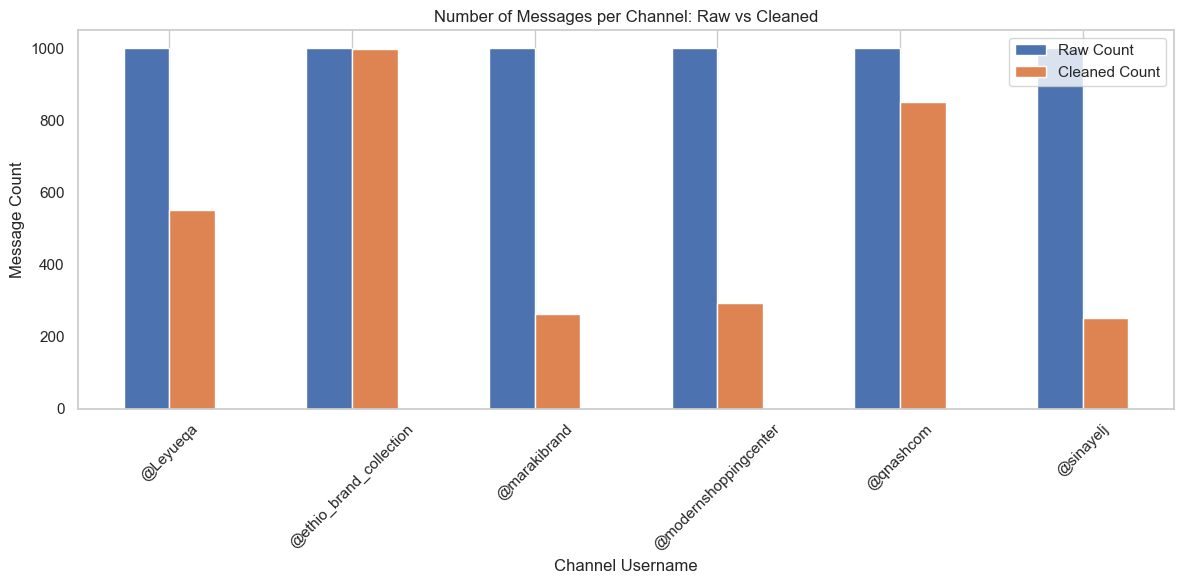

In [14]:
# Load raw and cleaned datasets
raw_df = pd.read_csv('../data/raw/telegram_data.csv')
clean_df = pd.read_csv('../data/processed/clean_telegram_data.csv')

# Count messages per channel
raw_counts = raw_df['Channel Username'].value_counts().sort_index()
clean_counts = clean_df['Channel Username'].value_counts().sort_index()

# Combine into a single DataFrame
counts_df = pd.DataFrame({
    'Raw Count': raw_counts,
    'Cleaned Count': clean_counts
}).fillna(0).astype(int)

print("Message counts per channel:\n", counts_df)

# Plot side-by-side bars
counts_df.plot(kind='bar', figsize=(12, 6))
plt.title('Number of Messages per Channel: Raw vs Cleaned')
plt.xlabel('Channel Username')
plt.ylabel('Message Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


### Image count per channel

                      Image Count
Leyueqa                       643
ethio                         999
marakibrand                   980
modernshoppingcenter          824
qnashcom                      583
sinayelj                      966


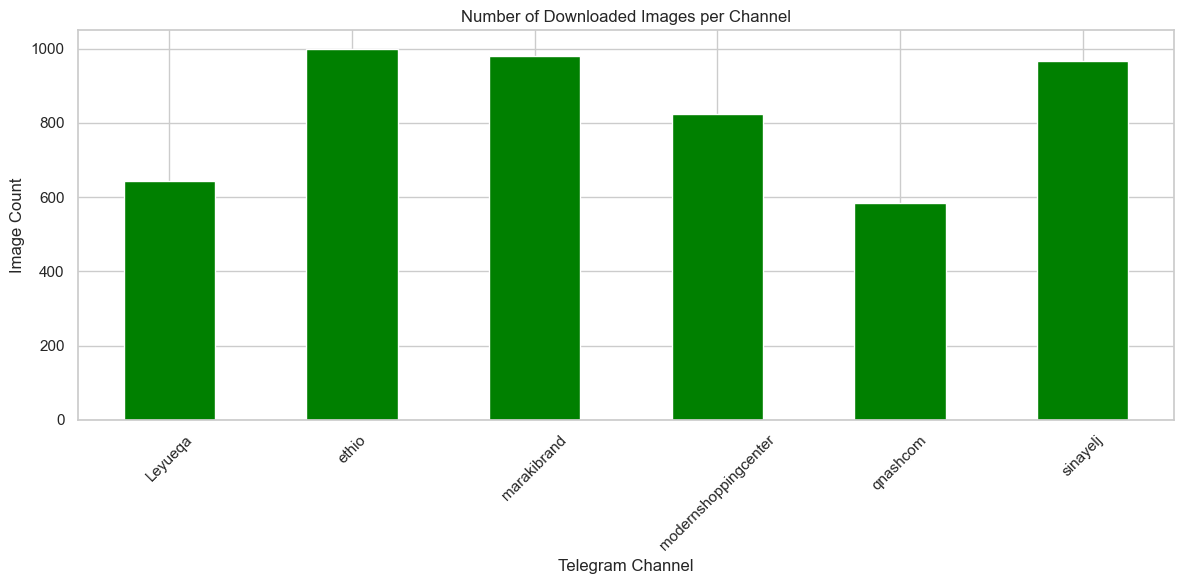

In [15]:
# Count number of images per channel from filenames
image_dir = "../data/raw/photos"
image_files = os.listdir(image_dir)

# Assumes filenames like: 'channelname_12345.jpg'
channel_names = [img.split('_')[0] for img in image_files if img.endswith('.jpg')]
image_counts = Counter(channel_names)

# Convert to DataFrame
img_df = pd.DataFrame.from_dict(image_counts, orient='index', columns=["Image Count"]).sort_index()

# Display image counts
print(img_df)

# Plot image counts
img_df.plot(kind='bar', legend=False, color='green')
plt.title("Number of Downloaded Images per Channel")
plt.xlabel("Telegram Channel")
plt.ylabel("Image Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()